<div>
<img src="https://www.headlinesoftoday.com/wp-content/uploads/2020/03/Indian-Premier-League-IPL-2020-Full-ScheduleTime-Table-and-Venue-and-Fixtures-e1588313204876.jpg" width="550"/>
</div>

<div class="alert alert-block alert-info">  
<h1><strong><center>🏏 Indian Premier League</center></strong></h1>
    <p>The Indian Premier League is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.
    </p>
</div>

> Aim: To create clusters of players based on their strengths in order to show a well-rounded cricket team of all time.


### Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [2]:
custom_colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

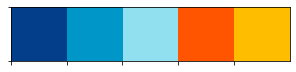

In [3]:
sns.palplot(sns.color_palette(custom_colors),size=1)

In [4]:
sns.set_context("poster")

In [5]:
players = pd.read_csv(r'../input/indian-premier-league-csv-dataset/Player.csv')
players = players.drop(["Is_Umpire", "Unnamed: 7"], axis = 1)
players.head(10)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan
5,6,R Dravid,11-Jan-73,Right_Hand,Right-arm offbreak,India
6,7,W Jaffer,16-Feb-78,Right_Hand,Right-arm offbreak,India
7,8,V Kohli,5-Nov-88,Right_Hand,Right-arm medium,India
8,9,JH Kallis,16-Oct-75,Right_Hand,Right-arm fast-medium,South Africa
9,10,CL White,18-Aug-83,Right_Hand,Legbreak googly,Australia


In [6]:
runs = pd.read_csv(r'../input/indian-premier-league-csv-dataset/Ball_by_Ball.csv')
runs.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,
5,335987,1,1,6,1,2,2,2,1,14,0,,,,,
6,335987,1,1,7,1,2,2,2,1,14,0,legbyes,1,,,
7,335987,1,2,1,1,2,2,2,1,15,0,,,,,
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,


In [7]:
runs.Dissimal_Type.unique()

array([' ', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [8]:
runs['Dissimal_Type'] = runs['Dissimal_Type'].replace(r'^\s*$', np.nan, regex=True)

In [9]:
runs.dtypes

Match_Id                     int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored              object
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [10]:
runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)

In [11]:
runs.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0.0,legbyes,1.0,,NaN,
1,335987,1,1,2,1,2,2,2,1,14,0.0,,0.0,,NaN,
2,335987,1,1,3,1,2,2,2,1,14,0.0,wides,1.0,,NaN,
3,335987,1,1,4,1,2,2,2,1,14,0.0,,0.0,,NaN,
4,335987,1,1,5,1,2,2,2,1,14,0.0,,0.0,,NaN,


### Batsmen

> *strike_rate = runs per 100 balls faced*

In [12]:
batsmen_runs = []
batsmen_ballsFaced = []

for i in runs["Striker_Id"].unique():
    r = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i].count()
    batsmen_runs.append(r)
    batsmen_ballsFaced.append(b)

batsmen = pd.DataFrame({"Player_Id": runs["Striker_Id"].unique()})

batsmen["Runs"] = batsmen_runs
batsmen["Balls_played"] = batsmen_ballsFaced

batsmen["Strike_Rate"] = (batsmen["Runs"] * 100 / batsmen["Balls_played"]).round(2)

In [13]:
batsmen.head(5)

,Player_Id,Runs,Balls_played,Strike_Rate
0,1,1349.0,1326,101.73
1,2,2435.0,1954,124.62
2,3,91.0,129,70.54
3,4,1322.0,1101,120.07
4,5,64.0,84,76.19


In [14]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,12),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=25)
    plt.tight_layout(pad=3.0)
    plt.show()

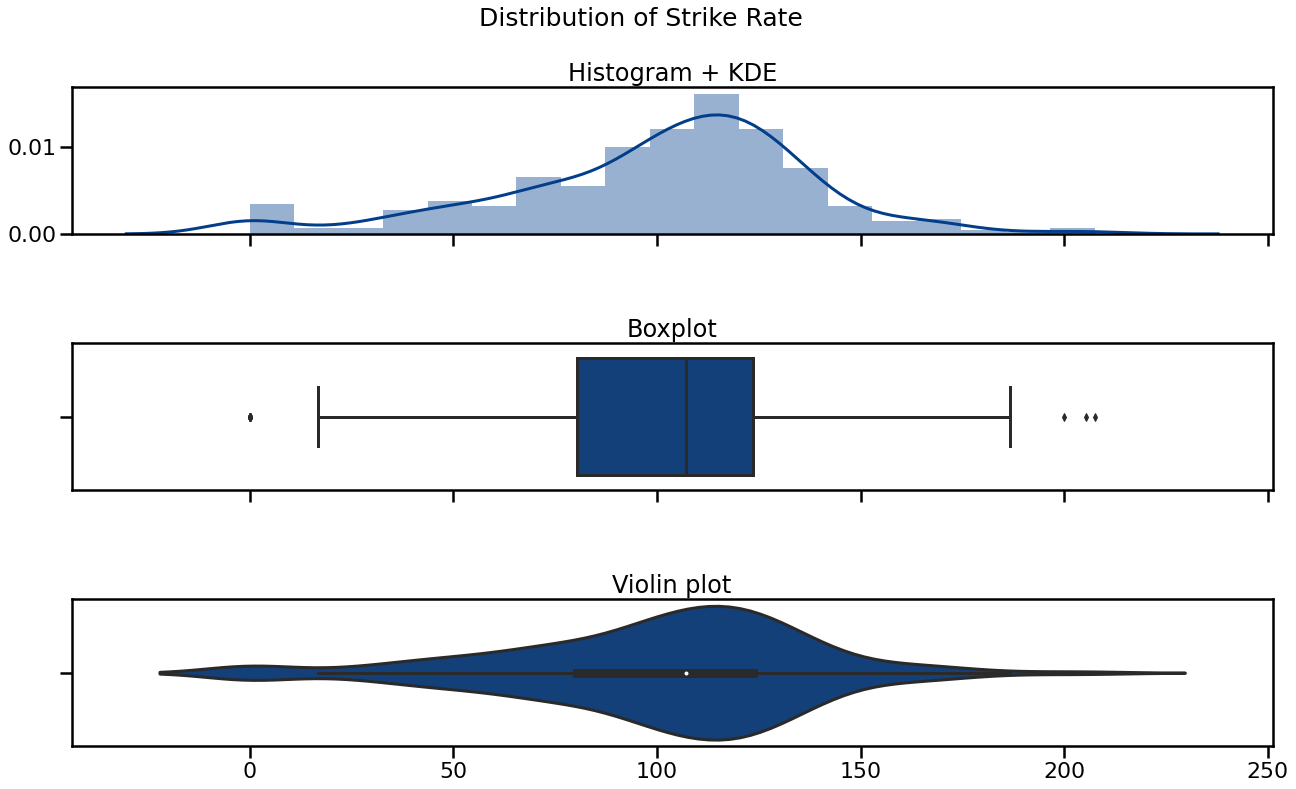

In [15]:
triple_plot(batsmen["Strike_Rate"],'Distribution of Strike Rate',custom_colors[0])

*We notice the presence of outliers with the help of the box plot for strike rate.*

*Players with low strike rate are eliminated*

In [16]:
batsmen = batsmen[batsmen["Strike_Rate"] > 120]

In [17]:
batsmen.head()

,Player_Id,Runs,Balls_played,Strike_Rate
1,2,2435.0,1954,124.62
3,4,1322.0,1101,120.07
7,8,4105.0,3236,126.85
9,10,971.0,774,125.45
10,11,394.0,318,123.90


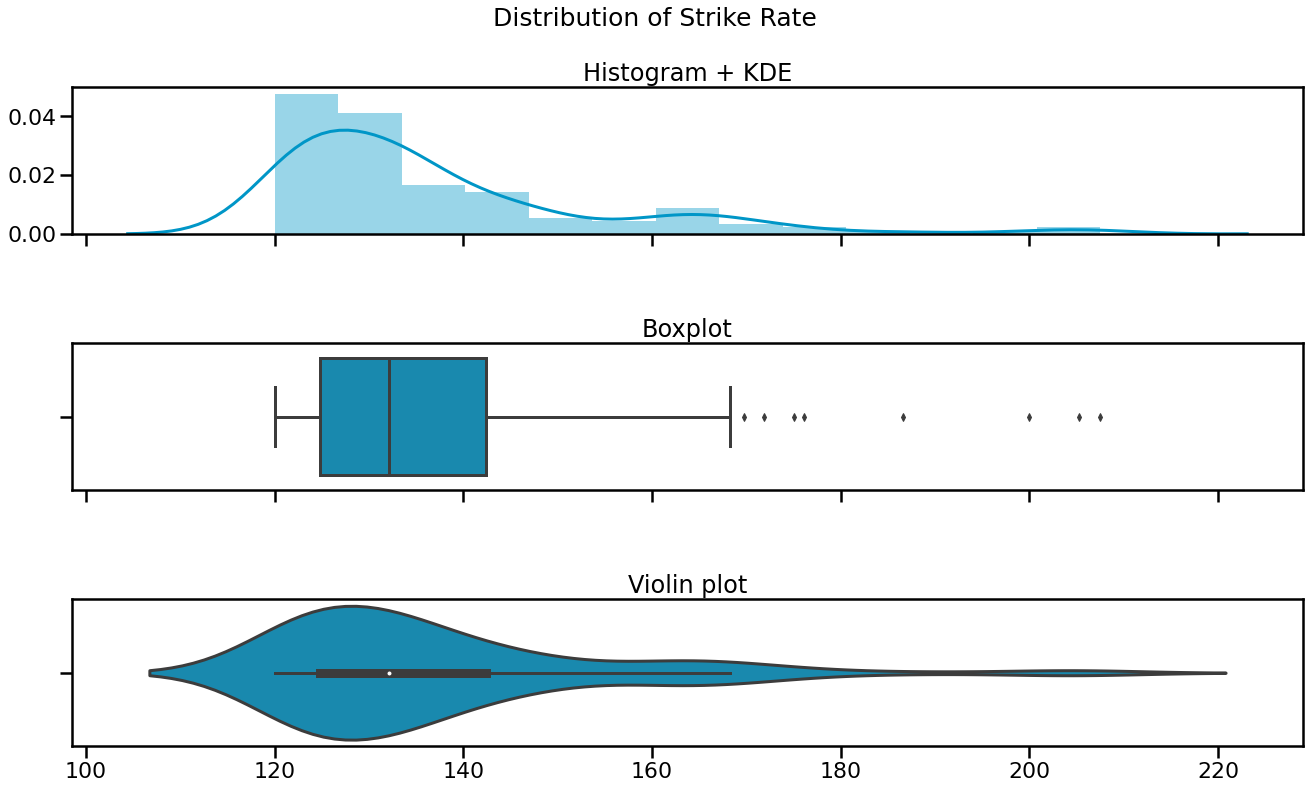

In [18]:
triple_plot(batsmen["Strike_Rate"],'Distribution of Strike Rate',custom_colors[1])

In [19]:
def scatter_plot(data,title,c,col1,col2):
    fig = plt.figure(figsize=(12,6))
    sns.scatterplot(x=col1, y=col2, data=data,color=c)
    plt.title(title)
    plt.show()

### K Means Clustering on Batsmen Data 

In [20]:
def elbow_method(X):
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(2,10) 

    for k in K:  
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)     

        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                          'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 

        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 
                     'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 

    print("Distortion")
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val)) 

    print("Inertia")
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 

    plt.plot(K, distortions, 'bx-',color=custom_colors[3]) 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.xticks(K)
    plt.title('Elbow Method using Distortion') 
    plt.show() 

    plt.plot(K, inertias, 'bx-',color=custom_colors[4]) 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.xticks(K)
    plt.title('Elbow Method using Inertia') 
    plt.show() 

Distortion
2 : 373.7675670507112
3 : 220.55246141798668
4 : 161.56215104490275
5 : 128.79189157004683
6 : 116.1682783375728
7 : 92.56098674557762
8 : 82.68223677986197
9 : 68.68341536344919
Inertia
2 : 27964964.465512753
3 : 13873508.04033103
4 : 5512937.505840904
5 : 3505558.5424463726
6 : 2709186.9748408175
7 : 1910696.9009444402
8 : 1282211.1909693487
9 : 906374.8747559212


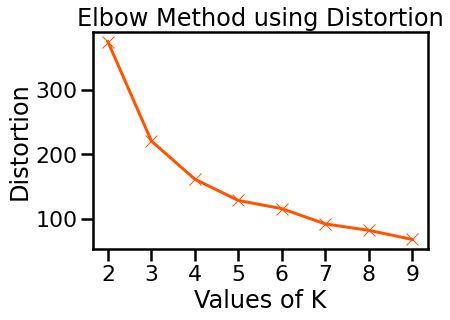

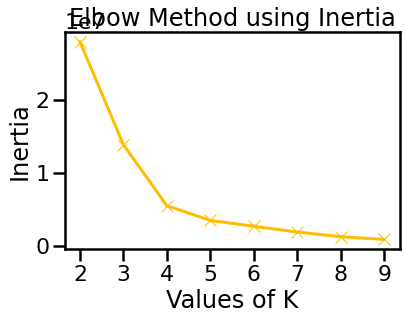

In [21]:
elbow_method(batsmen[["Strike_Rate", "Runs"]])

In [22]:
def scores(X):
    K = range(3,8) 

    for k in K:  
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X) 
        y_hat = kmeans.predict(X)
        labels = kmeans.labels_
        
        a = metrics.silhouette_score(X, labels, metric = 'euclidean')
        b = metrics.calinski_harabasz_score(X, labels)
        
        print("k={0}, Silhouette score={1}, Calinski harabasz score={2}".format(k,a, b))

In [23]:
scores(batsmen[["Strike_Rate", "Runs"]])

k=3, Silhouette score=0.6936083344492991, Calinski harabasz score=609.1041885568557
k=4, Silhouette score=0.7153226890295874, Calinski harabasz score=1079.804486795056
k=5, Silhouette score=0.6643845661980747, Calinski harabasz score=1282.26794241417
k=6, Silhouette score=0.635199608948108, Calinski harabasz score=1325.647018084192
k=7, Silhouette score=0.6336067778587674, Calinski harabasz score=1561.7377647734513


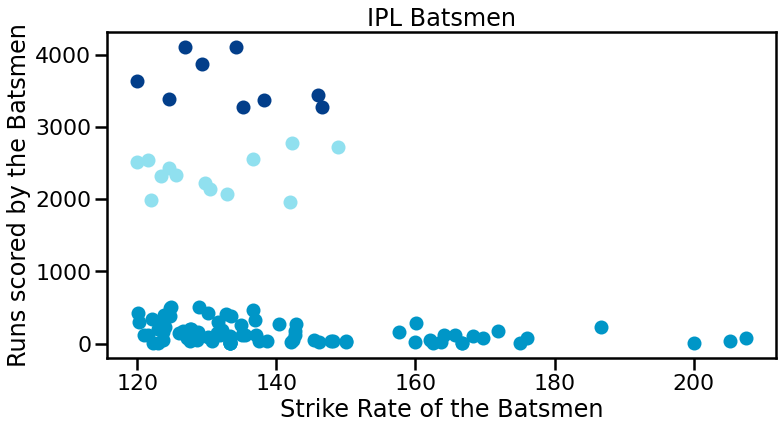

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(batsmen[["Strike_Rate", "Runs"]])
batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = custom_colors

for r in range(1,6):
    clustered_Batsmen = batsmen[batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen")
plt.xlabel("Strike Rate of the Batsmen")
plt.ylabel("Runs scored by the Batsmen")
plt.show()

In [25]:
batsmen = batsmen.sort_values(by='cluster')

In [26]:
Players_batsmen = players[["Player_Id", "Player_Name","Batting_Hand","DOB","Country"]]

Displaying the Batting Hand of Batsmen

In [27]:
batsmen = batsmen[batsmen.columns].merge(Players_batsmen, "left")
batsmen

,Player_Id,Runs,Balls_played,Strike_Rate,cluster,Player_Name,Batting_Hand,DOB,Country
0,236,924.0,760,121.58,0,Mandeep Singh,Right_Hand,18-Dec-91,India
1,71,1262.0,1032,122.29,0,DJ Bravo,Right_Hand,7-Oct-83,West Indies
2,383,942.0,762,123.62,0,LMP Simmons,Right_Hand,25-Jan-85,West Indies
3,104,1400.0,1153,121.42,0,BJ Hodge,Right_Hand,29-Dec-74,Australia
4,355,726.0,566,128.27,0,Q de Kock,Left_Hand,17-Dec-92,South Africa
...,...,...,...,...,...,...,...,...,...
129,208,2325.0,1884,123.41,3,AT Rayudu,Right_Hand,23-Sep-85,India
130,147,2146.0,1645,130.46,3,DR Smith,Right_Hand,12-Apr-83,West Indies
131,185,2511.0,2092,120.03,3,M Vijay,Right_Hand,1-Apr-84,India
132,41,2728.0,1833,148.83,3,V Sehwag,Right_Hand,20-Oct-78,India


**Batting Hand and Cluster assigned to players**

In [28]:
fig = px.sunburst(batsmen, path=['Batting_Hand', 'cluster'],color='cluster')
fig.show()

In [29]:
batsmen.to_csv('/kaggle/working/Batsmen.csv') 

### Bowlers

> economy rate = total runs conceded/number of overs bowled

In [30]:
bowlers_runs = []
bowlers_over_count = []

for j in runs["Bowler_Id"].unique():
    r = runs["Batsman_Scored"][runs["Bowler_Id"] == j].sum() + runs["Extra_Runs"][runs["Bowler_Id"] == j].sum()
    o = runs["Over_Id"][runs["Bowler_Id"] == j].count()/6
    
    bowlers_runs.append(r)
    bowlers_over_count.append(o)
    
bowlers = pd.DataFrame({"Player_Id": runs["Bowler_Id"].unique()})

bowlers["Runs"] = bowlers_runs
bowlers["Over_count"] = bowlers_over_count

bowlers["Econ_Rate"] = (bowlers["Runs"] / bowlers["Over_count"]).round(2)

bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate
0,14,3135.0,421.500000,7.44
1,15,2511.0,338.333333,7.42
2,13,41.0,4.166667,9.84
3,9,2316.0,299.833333,7.72
4,16,82.0,9.166667,8.95


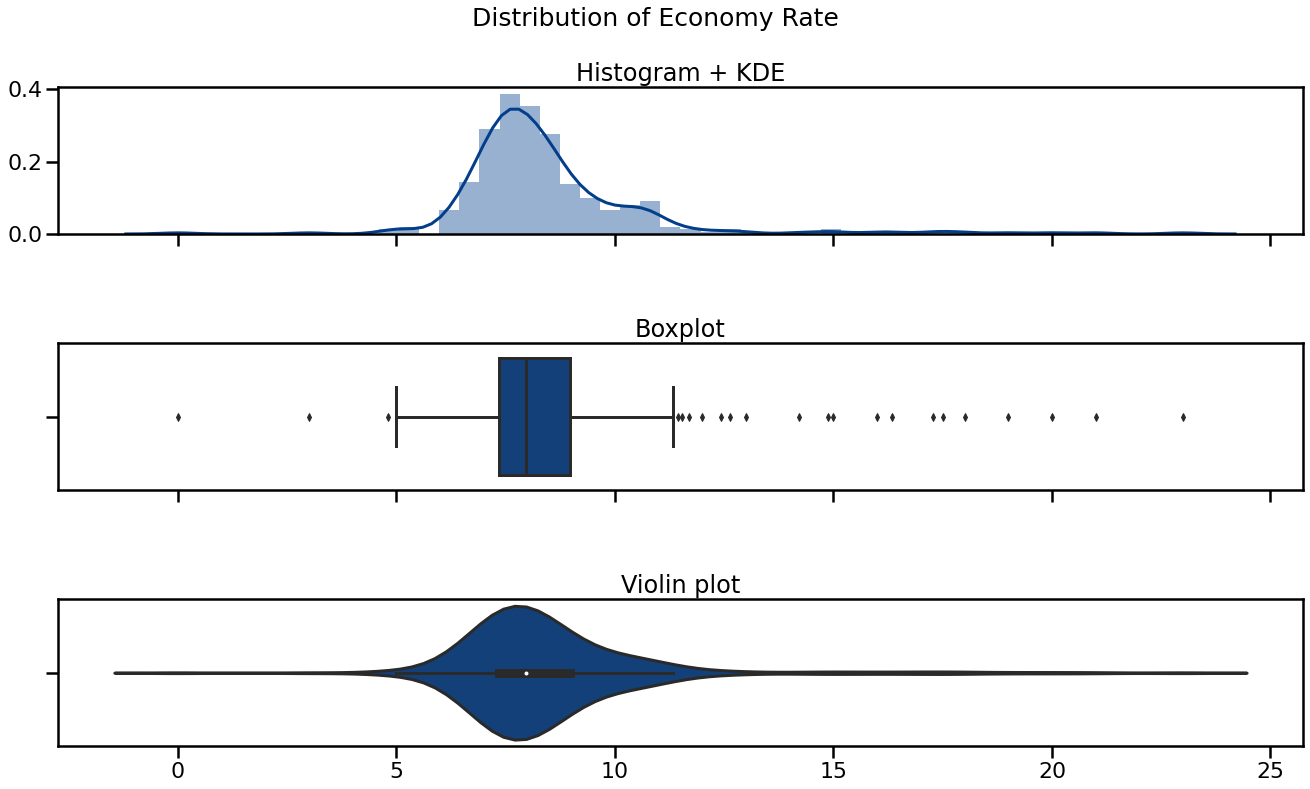

In [31]:
triple_plot(bowlers["Econ_Rate"],'Distribution of Economy Rate',custom_colors[0])

In [32]:
bowlers = bowlers[(bowlers["Econ_Rate"] > 4) & (bowlers["Econ_Rate"] < 8.5)]

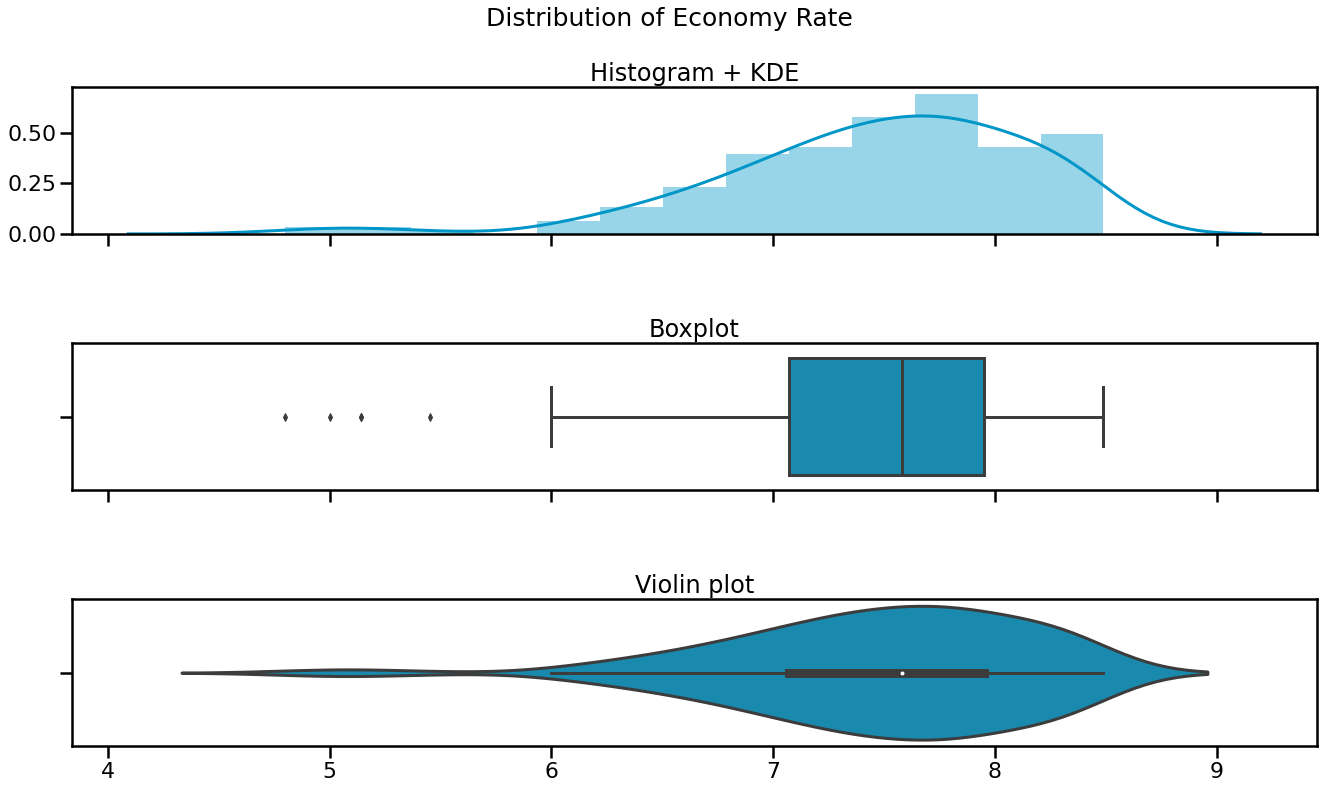

In [33]:
triple_plot(bowlers["Econ_Rate"],'Distribution of Economy Rate',custom_colors[1])

### K Means Clustering on Bowlers Data 

Distortion
2 : 373.7675670507113
3 : 220.55246141798665
4 : 161.5621510449027
5 : 128.79189157004683
6 : 116.16827833757286
7 : 94.71580359993747
8 : 83.2324760414136
9 : 68.68341536344916
Inertia
2 : 27964964.465512734
3 : 13873508.040331038
4 : 5512937.505840899
5 : 3505558.542446372
6 : 2709186.974840818
7 : 2019154.4886159536
8 : 1289678.0815194242
9 : 906374.8747559208


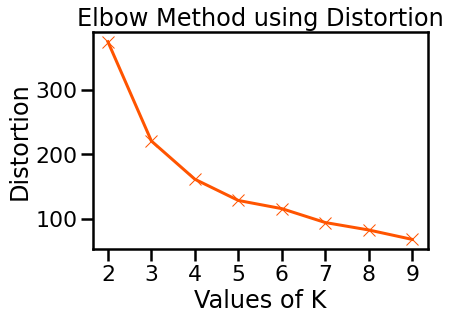

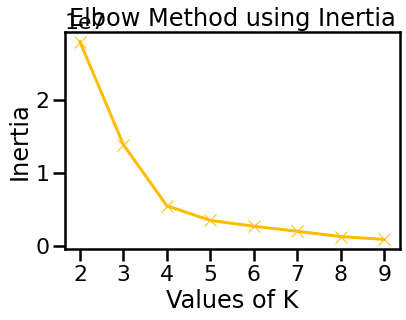

In [34]:
elbow_method(batsmen[["Strike_Rate", "Runs"]])

In [35]:
scores(batsmen[["Strike_Rate", "Runs"]])

k=3, Silhouette score=0.6936083344492991, Calinski harabasz score=609.1041885568558
k=4, Silhouette score=0.7153226890295875, Calinski harabasz score=1079.804486795056
k=5, Silhouette score=0.6643845661980747, Calinski harabasz score=1282.2679424141702
k=6, Silhouette score=0.6351996089481081, Calinski harabasz score=1325.6470180841923
k=7, Silhouette score=0.6336067778587675, Calinski harabasz score=1561.7377647734515


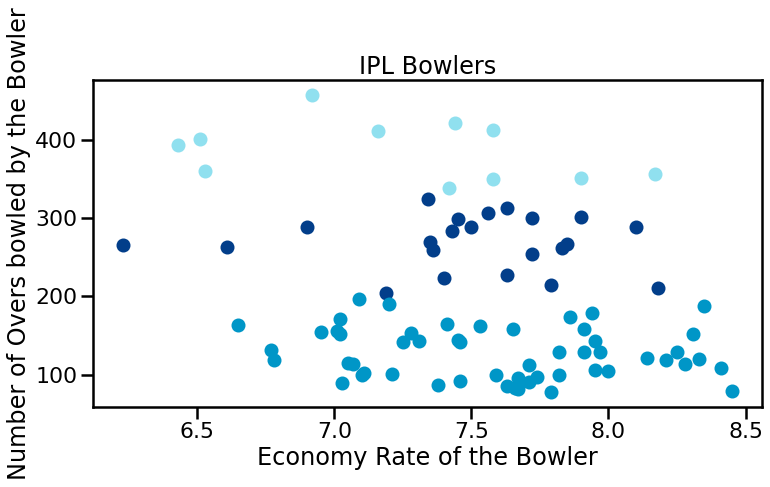

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(bowlers[["Econ_Rate", "Over_count"]])
bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = custom_colors

for r in range(1,5):
    clustered_Bowlers = bowlers[bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Over_count"], color=colors[r-1])
    
plt.title("IPL Bowlers")
plt.xlabel("Economy Rate of the Bowler")
plt.ylabel("Number of Overs bowled by the Bowler")
    
plt.show()

In [37]:
bowlers = bowlers.sort_values(by = 'cluster')
bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate,cluster
154,219,8.0,1.000000,8.00,0
188,259,130.0,16.166667,8.04,0
190,274,406.0,54.500000,7.45,0
192,171,42.0,7.000000,6.00,0
193,265,20.0,3.000000,6.67,0


In [38]:
Players_bowlers = players[["Player_Id", "Player_Name","Bowling_Skill","DOB","Country"]]

Displaying the Bowling Skill of Batsmen

In [39]:
bowlers = bowlers[bowlers.columns].merge(Players_bowlers, "left")
bowlers

,Player_Id,Runs,Over_count,Econ_Rate,cluster,Player_Name,Bowling_Skill,DOB,Country
0,219,8.0,1.000000,8.00,0,RS Gavaskar,Slow left-arm orthodox,20-Feb-76,India
1,259,130.0,16.166667,8.04,0,RV Gomez,Right-arm medium,16-Oct-85,India
2,274,406.0,54.500000,7.45,0,AC Thomas,Right-arm fast-medium,9-Feb-77,England
3,171,42.0,7.000000,6.00,0,M Manhas,Right-arm offbreak,12-Oct-79,India
4,265,20.0,3.000000,6.67,0,NJ Rimmington,Right-arm fast-medium,11-Nov-82,Australia
...,...,...,...,...,...,...,...,...,...
209,194,2611.0,401.166667,6.51,3,SL Malinga,Right-arm fast,28-Aug-83,Sri Lanka
210,94,2350.0,359.833333,6.53,3,DW Steyn,Right-arm fast,27-Jun-83,South Africa
211,136,2941.0,411.000000,7.16,3,A Mishra,Legbreak,24-Nov-82,India
212,50,3162.0,457.000000,6.92,3,Harbhajan Singh,Right-arm offbreak,3-Jul-80,India


In [40]:
bowlers = bowlers[bowlers['Bowling_Skill'].notna()]

**Bowling Skill and Cluster assigned to players**

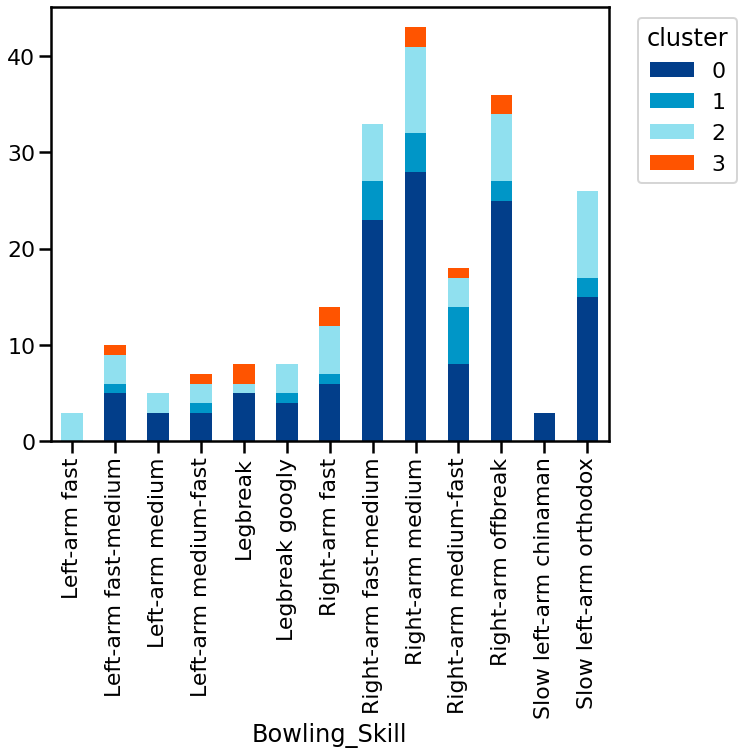

In [41]:
df_b = bowlers[['Bowling_Skill','cluster']].copy()
ct = pd.crosstab(df_b.Bowling_Skill, df_b.cluster)

ct.plot.bar(stacked=True)
plt.legend(title='cluster',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.show()

In [42]:
bowlers.to_csv('/kaggle/working/Bowlers.csv') 

In [43]:
final=pd.concat([batsmen,bowlers],sort="True").reset_index(drop=True)
final

,Balls_played,Batting_Hand,Bowling_Skill,Country,DOB,Econ_Rate,Over_count,Player_Id,Player_Name,Runs,Strike_Rate,cluster
0,760.0,Right_Hand,NaN,India,18-Dec-91,NaN,NaN,236,Mandeep Singh,924.0,121.58,0
1,1032.0,Right_Hand,NaN,West Indies,7-Oct-83,NaN,NaN,71,DJ Bravo,1262.0,122.29,0
2,762.0,Right_Hand,NaN,West Indies,25-Jan-85,NaN,NaN,383,LMP Simmons,942.0,123.62,0
3,1153.0,Right_Hand,NaN,Australia,29-Dec-74,NaN,NaN,104,BJ Hodge,1400.0,121.42,0
4,566.0,Left_Hand,NaN,South Africa,17-Dec-92,NaN,NaN,355,Q de Kock,726.0,128.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
343,NaN,NaN,Right-arm fast,Sri Lanka,28-Aug-83,6.51,401.166667,194,SL Malinga,2611.0,NaN,3
344,NaN,NaN,Right-arm fast,South Africa,27-Jun-83,6.53,359.833333,94,DW Steyn,2350.0,NaN,3
345,NaN,NaN,Legbreak,India,24-Nov-82,7.16,411.000000,136,A Mishra,2941.0,NaN,3
346,NaN,NaN,Right-arm offbreak,India,3-Jul-80,6.92,457.000000,50,Harbhajan Singh,3162.0,NaN,3


In [44]:
final.to_csv('/kaggle/working/final.csv')

### Example of a well-rounded Team

Selecting top 5 batsmen

In [45]:
batsmen_team=batsmen[['Player_Name','Strike_Rate','DOB','Country']].sort_values(by=['Strike_Rate'],ascending=False)
batsmen_team=batsmen_team.head(5)
batsmen_team

,Player_Name,Strike_Rate,DOB,Country
64,CR Brathwaite,207.50,18-Jul-88,West Indies
86,Umar Gul,205.26,14-Apr-84,Pakistan
120,RS Sodhi,200.00,18-Oct-80,India
75,KH Pandya,186.61,24-Mar-91,India
100,Shahid Afridi,176.09,1-Mar-80,Pakistan


Selecting top 5 bowlers

In [46]:
bowlers_team=bowlers[['Player_Name','Econ_Rate','DOB','Country']].sort_values(by=['Econ_Rate'])
bowlers_team=bowlers_team.head(5)
bowlers_team

,Player_Name,Econ_Rate,DOB,Country
60,Sachin Baby,4.80,18-Dec-88,India
28,AM Rahane,5.00,6-Jun-88,India
17,SS Mundhe,5.14,27-Oct-88,India
25,LA Carseldine,5.14,17-Nov-75,Australia
96,DJ Thornely,5.45,1-Oct-78,Australia


Selecting top 10 all rounders

In [47]:
d1 = pd.merge(batsmen,bowlers, how='inner', on=['Player_Id'])
d2 = pd.merge(d1,players, on='Player_Id')
all_rounder_team=d2[['Player_Name_x','Strike_Rate','Econ_Rate','DOB','Country']]
all_rounder_team.rename(columns = {'Player_Name_x':'Player_Name'}, inplace = True) 
all_rounder_team=all_rounder_team.head(10)
all_rounder_team

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,DJ Bravo,122.29,7.90,7-Oct-83,West Indies
1,BJ Hodge,121.42,7.79,29-Dec-74,Australia
2,JD Ryder,129.61,7.67,6-Aug-84,New Zealand
3,KP Pietersen,132.06,7.13,27-Jun-80,South Africa
4,MC Henriques,122.70,7.82,1-Feb-87,Australia
5,AD Mathews,121.19,7.97,2-Jun-87,Sri Lanka
6,STR Binny,126.94,7.38,3-Jun-84,India
7,AD Russell,164.00,8.41,29-Apr-88,West Indies
8,A Symonds,124.71,7.71,9-Jun-75,Australia
9,JA Morkel,136.94,7.90,10-Jun-81,South Africa


In [48]:
df=pd.concat([batsmen_team,bowlers_team,all_rounder_team],sort=True).drop_duplicates(subset='Player_Name', keep="first").reset_index(drop=True)
df=df[['Player_Name','Strike_Rate','Econ_Rate','DOB','Country']]
print("-"*30,"Well rounded team","-"*30,"\n")
df

------------------------------ Well rounded team ------------------------------ 



,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,CR Brathwaite,207.50,NaN,18-Jul-88,West Indies
1,Umar Gul,205.26,NaN,14-Apr-84,Pakistan
2,RS Sodhi,200.00,NaN,18-Oct-80,India
3,KH Pandya,186.61,NaN,24-Mar-91,India
4,Shahid Afridi,176.09,NaN,1-Mar-80,Pakistan
5,Sachin Baby,NaN,4.80,18-Dec-88,India
6,AM Rahane,NaN,5.00,6-Jun-88,India
7,SS Mundhe,NaN,5.14,27-Oct-88,India
8,LA Carseldine,NaN,5.14,17-Nov-75,Australia
9,DJ Thornely,NaN,5.45,1-Oct-78,Australia


The players with:

Strike_Rate: NaN are **batsmen**

Economy_Rate: NaN are **bowlers**

both Strike_Rate and Economy_Rate listed are **all rounders**.